<a href="https://colab.research.google.com/github/LosPowerPeralta/ADA-Informes-Jorge/blob/main/MergeSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Problema de ordenamiento**
**Entrada**: Un conjunto de n numeros $[a_1,a_2,...,a_n]$.

**Salida**: Secuencia ordenada de la entrada $[a_1',a_2',...,a_n']$ de forma que quede cada numero al momento de su salida sea menor al anterior $a_1'\leq a_2' \leq... \leq a_n'$.  

El algoritmo MergeSort es un metodo de ordenamiento de tipo divide y venceras, debido a que por medio de la division logra simplificar y resolver los problemas de ordenamiento.

Este algoritmo recibe un conjunto de numeros no necesariamente ordenad (arreglo) y como salida devuelve un arreglo ordenado numericamente de menor a mayor.

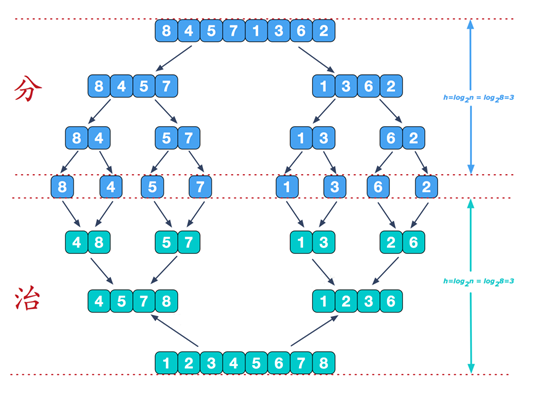

# 2.Algoritmo MergeSort

A continuacion se moestrara codigo de su funcionamiento tanto de **Merge** como de **MergeSort**.

In [114]:
import random as rd
import matplotlib.pyplot as plt
import datetime
import math as mt
from timeit import repeat
from termcolor import colored

In [115]:
#Funcion Merge

def Merge(der, izq, verbose, comparaciones, contador):
  b = []
  while  True: 
    if len(der) > 0 and len(izq) > 0: #Mientras alguno de los arreglos su largo sea mayor que 0 se mantendra el ciclo infinito.
      if der[0] < izq[0]: #Si la el numero de la derecha es mayor que el de la izquierda se ingresa en el nuevo arreglo que estara ordenado y automaticamente se borra del arreglo de la derecha.
        comparaciones = comparaciones + 1
        b.append(der[0])
        der.pop(0)
      else:
        comparaciones = comparaciones + 1
        b.append(izq[0]) #Si la el numero de la izquierda es mayor que el de la derecha se ingresa en el nuevo arreglo que estara ordenado y automaticamente se borra del arreglo de la izquierda.
        izq.pop(0) 
    else:
      break; 
      
  if len(izq) > 0 :#Debido a que el ciclo while anterior se detiene hasta completar la totalidad de uno de sus arreglos, se deben de ingresar los numeros restantes del otro dentro de nuestro nuevo arreglo.
    while len(izq) > 0:
      comparaciones = comparaciones + 1
      b.append(izq[0])
      izq.pop(0)
  else:
    while len(der) > 0:
      comparaciones = comparaciones + 1
      b.append(der[0])
      der.pop(0)
      
  if(verbose):
    print("Combinando")
    print(b, "\n")
  return b, comparaciones, contador

In [157]:
#Funcion MergeSort

def MergeSort(A, verbose, c, contador):
  largo = len(A)
  if(largo == 1): return A, c, contador #Si el largo del arreglo es 1 se retorna inmediatamente junto a la cantidad de comparaciones.
  mitad = largo//2

  izquierda = A[0:mitad] #Se guarda la mitad izquierda.
  derecha = A[mitad:] #Se guarda la mitad derecha.
  contador = contador + 1
  if (verbose):
    print("Arreglo")
    print(colored(f"{str(A[:])}","blue"))
    print("Separando")
    print(colored(f"{str(A[0:mitad])}","yellow"),",",colored(f"{str(A[mitad:])}","green"))

  izquierda, c, contador = MergeSort(izquierda, verbose,c, contador) #Se llama de forma recursiva al MergeSort de modo que separe cada numero del arreglo.
  derecha, c, contador = MergeSort(derecha, verbose, c, contador)

  return Merge(derecha, izquierda, verbose, c, contador) #Dado cada numero separado se envian al Merge para su comparacion y union.


Entrada: $a=[5,7,6,9,3]$

Salida: $a=[3,5,6,7,9]$

# 2.2. Descripcion del algoritmo
El algoritmo o codigo recibe inicialmente un arreglo de n elementos numericos que deben de ser ordenados mediante los siguientes pasos.

MergeSort funcionara de la siguiente manera:

1. Primeramente se dividen los arreglos por la mitad (n/2) dejando dos sub arreglos, hasta que quede cada numero por separado es decir un arreglo de tamaño 1.

2. Con el uso del MergeSort se ordenan estos sub arreglos de menor a mayor.

3. Finalmente con la funcion merge uno combina los diferentes sub arreglos ordenados de modo que quede unicamente uno.

# 2.3. Ejemplo
$a=[5,8,7,1,3]$

Como ejemplo podemos conserar el arreglo:

En el primer paso se realiza la particion por la mitad de nuestro arreglo "a", en caso de ser par quedan dos sub arreglos del mismo tamaño a diferencia de que este sea impar donde quedara dos sub arreglos de distintos tamaños.

  $[5,8], [7,1,3]$

Posteriormente estos arreglos se subdividen hasta que cada numero quede con un arreglo de tamaño 1.

  $[5], [8], [7], [1], [3]$

Dado cada numero con su arreglo de tamaño 1 se procede a hacer uso de la funcion Merge que se encarga de comparar y unir todos los sub arreglos en solo uno, aunque esto lo hace comparando primeramente los sub arreglos que separo anteriormente para despues unirlo ordenado con el otro sub arreglo.

  $[5,8], [1,3,7]$

Por ultimo se unen ambos sub arreglos ordenados para dar como resultado un unico arreglo ordenado.

  $[1,3,5,7,8]$

# 2.4. Ejecucion del algoritmo paso a paso (verbose=True)
Debido a esta opcion podemos ver el funcionamiento paso a paso en cada iteracion.

In [117]:
arreglo = [3,1,5,6]
c = 0
contador = 0
arreglo, c, contador = MergeSort(arreglo, True, c, contador)
print("Arreglo ordenado:", arreglo)
print("Total de Comparaciones:", c)
print("Contador MergeSort", contador)


Arreglo
[3, 1, 5, 6]
Separando
[3, 1] , [5, 6]
Arreglo
[3, 1]
Separando
[3] , [1]
Combinando
[1, 3] 

Arreglo
[5, 6]
Separando
[5] , [6]
Combinando
[5, 6] 

Combinando
[1, 3, 5, 6] 

Arreglo ordenado: [1, 3, 5, 6]
Total de Comparaciones: 8
Contador MergeSort 3


En cada iteracion se recorre:

*   Elemento de la lista
*   Elemento de la sublista

Color azul: Arreglo normal/ SubArreglo.

Color amarillo: Arreglo izquierda separandose.

Color verde: Arreglo derecha separandose.

Color blanco: Arreglo ordenado.

#3. Tiempo de Ejecución

##Teorema (Tiempo de ejecución)

El tiempo de ejecución de todos los casos del MergeSort tienen una complejidad de $O(nlogn)$.

###**Árbol de recurrencia**

Para poder entender la complejidad temporal de forma intuitiva podemos hacer uso de un árbol de recurrencia, el cual nos mostrará explicitamente la cantidad de operaciones que necesitaremos realizar en nuestro algorimo.

Primero, reemplazamos las complejidad $O(1)$ por una constante $c$ y las complejidades $O(n)$ por el termino $c*n$. 

$T(n) = \begin{cases}
  c  & n \text{ is small} \\
  2 T(n/2) + c \cdot n & \text{ otherwise}
\end{cases}$

Luego podemos apreciar el árbol de recursividad al hacer uso de la función definida anteriormente.

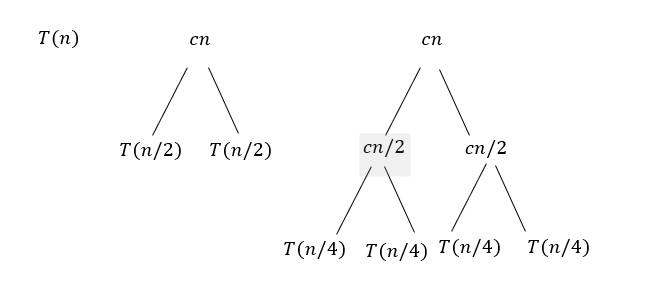


Hasta conseguir el árbol y los valores aproximados de sus operaciones.

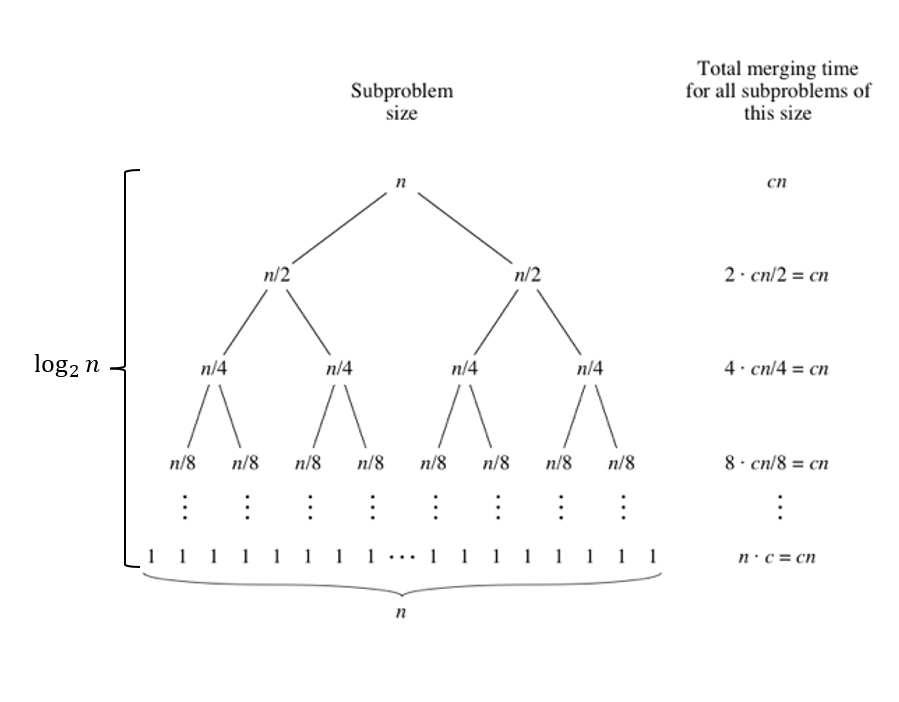

Finalmente analizando el árbol de recursión podemos decir que la suma de todos los tiempode es: $cn \log_2 n \rightarrow O(n \log n)$.


##Prueba del teorema

Teniendo en cuenta el funcionamiento del algoritmo, este no nos deja del todo claro cual es su mejor caso, peor caso o caso promedio ya que sin importar que tan ordenado se encuentre si o si el arreglo principal será subdividido hasta conseguir arreglos de tamaño 1. Por esta razón comprobaremos que el teorema mencionado anteriormente es verdadero con algunos casos de prueba.

In [119]:
for n in range(1,15):
  x = random.sample(range(1, 100), n)
  c = 0
  contador = 0
  x, comparaciones, cont = MergeSort(x, False, c, contador)

  n * mt.log2(n)
  print("Caso",n,":",x)
  print("Comparaciones y divisiones =", comparaciones, ", Aproximación matemática =", (n * mt.log2(n)) // 1, "\n")

Caso 1 : [93]
Comparaciones y divisiones = 0 , Aproximación matemática = 0.0 

Caso 2 : [65, 68]
Comparaciones y divisiones = 2 , Aproximación matemática = 2.0 

Caso 3 : [27, 62, 90]
Comparaciones y divisiones = 5 , Aproximación matemática = 4.0 

Caso 4 : [27, 38, 75, 90]
Comparaciones y divisiones = 8 , Aproximación matemática = 8.0 

Caso 5 : [5, 33, 42, 69, 91]
Comparaciones y divisiones = 12 , Aproximación matemática = 11.0 

Caso 6 : [29, 66, 67, 71, 85, 98]
Comparaciones y divisiones = 16 , Aproximación matemática = 15.0 

Caso 7 : [3, 36, 43, 47, 84, 85, 96]
Comparaciones y divisiones = 20 , Aproximación matemática = 19.0 

Caso 8 : [22, 30, 42, 55, 56, 83, 86, 98]
Comparaciones y divisiones = 24 , Aproximación matemática = 24.0 

Caso 9 : [3, 10, 13, 23, 32, 34, 55, 68, 81]
Comparaciones y divisiones = 29 , Aproximación matemática = 28.0 

Caso 10 : [1, 33, 34, 44, 46, 51, 72, 77, 80, 87]
Comparaciones y divisiones = 34 , Aproximación matemática = 33.0 

Caso 11 : [2, 18, 29,

#4. Correctitud

**Teorema de (Correctitud)**

El algoritmo MergeSort genera un arreglo: $[a_1',a_2',...,a_n']$, con los mismo elementos del arreglo de entrada ordenados de menor a mayor, es decir, $a_1'\leq a_2' \leq... \leq a_n'$. 

#Prueba del Teorema

Previamente observamos que el algoritmo por cada llamada a la función MergeSort el arreglo ser irá subdividiendo hasta obtener arreglos de tamaño 1 y poco a poco la función merge los irá ordenando.

Por lo tanto para demostrar la correctitud de la función MergeSort utilizaremos el método de demostración por inducción matemática y para la función Merge se utilizará la propiedad del bucle invariante.

##Prueba del teorema (Función Merge)

La función Merge tiene como entrada 2 arreglos los cuales serán ordenados de dentro de un nuevo arreglo.

Su proposito es buscar dentro de cada arreglo el menor valor para que de esta forma ser colocado en el arreglo resultante.

Para probarlo con la propiedad del bucle invariante, primero debes analizar la inicialización $(i = 0$ y $j = 0)$ de nuestro bucle y por último comprobar si este se mantiene durante la ejecución del mismo.


> Al comienzo de cada iteración $i$ y $j$ del bucle donde $i$ es el indice del primer arreglo y $j$ del segundo, el arreglo resultante debe encontrarse ordenado de menor a mayor.

**Inicialización**

Al comienzo de la primera iteración $(i = 0$ y $j = 0)$, los $i + j$ primeros elementos del nuevo arreglo se encontrarán ordenados. Esto es trivialmente cierto ya que estamos considerando un solo elemento.

**Mantención**

Empezamos considerando que al principio de cada iteración $i$ y $j$ se cumple la propiedad, es decir que los primeros elementos del arreglo resultante se encuentran ordenados de menor a mayor. En este caso consideraremos a $X$ como menor dato y a $Y$ como mayor de los dos arreglos (como se muestra en la figura).

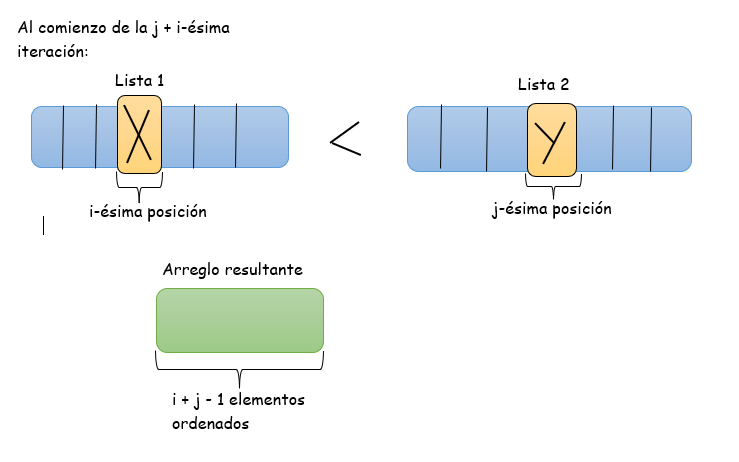

Durante la iteración de la función Merge el menor dato de los dos arreglos (osea $X$) será posicionado al final del arreglo resultante.

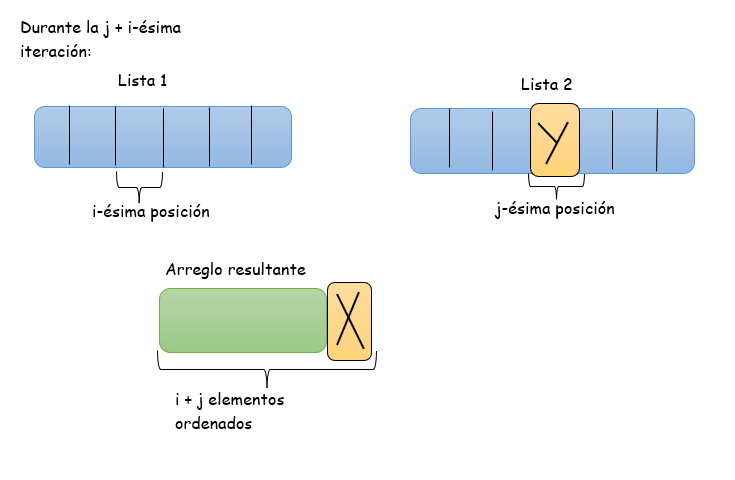

Al finalizar la iteración (y al comienzo de la siguiente), se seguirá cumpliendo la prioridad invariante.

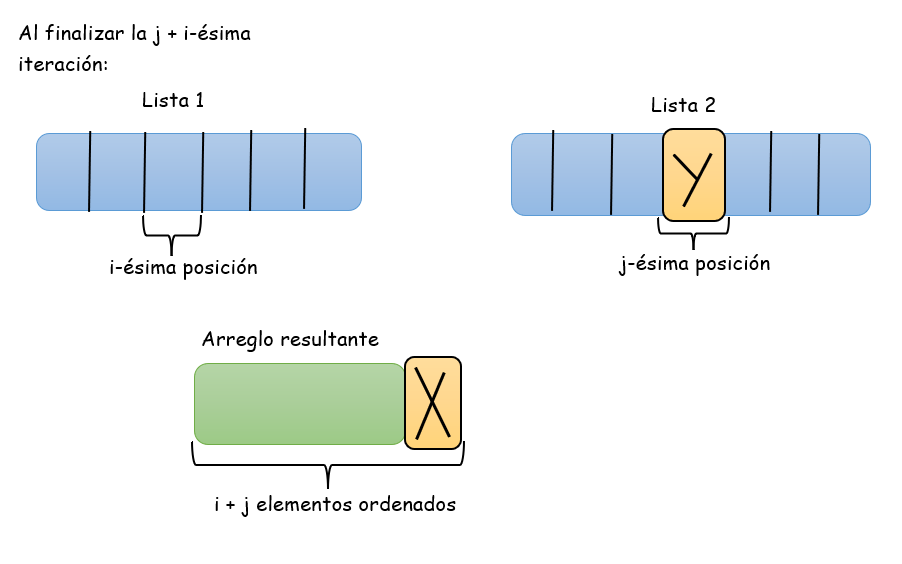

##Prueba del teorema (Función MergeSort)

En inducción matemática para probar una declaración $P(n)$, para todos los números naturales $n$ debemos realizar los siguientes pasos.

1.   Probar $P(n)$ con un caso base, por ejemplo $P(1)$.
2.   Probar si $P(m)$ es cierto para $m < n$, por lo tanto para $P(n)$ esto también estará correcto.

para nuestro caso base $P(1)$, como la función MergeSort recibe un arreglo de largo 1, está considera directamente que se encontrará ordenado. Por lo tanto se cumple $P(1)$.


Para nuestro segundo caso, considerando que nuestra función MergeSort recibe un arreglo de largo $n$, este lo irá subdividiendo en subarreglos de tamaño $m = [\frac{n}{2}]$ hasta conseguir arreglos de largo 1 para luego ser combinados y reordenados con la función Merge la cual ya tiene comprobada su correctitud.

#5. Experimentos

##5.1. Números de comparaciones

A continuación se muestra gráficamente una comparación entre:


*   Cantidad de comparaciones para entradas aleatorias, realizadas experimentalmente.
*   Comparación entre el tiempo de ejecución del algoritmo InsertionSort y MergeSort.
*   Comparación entre la cantidad de comparaciones entre InsertionSort y MergeSort.

Para problemas con $n ∈ [5,100]$

Los arreglos de entrada son:

**InsertionSort**
*  Mejor caso: La secuencia será un arreglo ordenado de 0 hasta $n - 1$.
*  Peor caso: La secuencia será un arreglo ordenado de $n - 1$ hasta 0.
*  Caso aleatorio: La secuancia será un arreglo de números aleatorios entre 1 y 100, con $n$ cantidad de elementos.

**MergeSort**

Como fue comprobado anteriormente MergeSort no tiene mejor o peor caso, por esta razón sus arreglos de entrada serán casos aleatorios.

##Código InsertionSort


In [105]:
def InsertionSort(a, verbose = False):
  contador = 0 #Contador de comparaciones
  largo = len(a) #Largo del arreglo

  if verbose == True: print("input array:", a)

  for i in range (1, largo):
    actual = a[i] #Guardando el numero actual que se comparara
    if verbose == True:
      print("\nPasada", i)
      print(str(a[:i])[1:-1],",",colored(f"{str(a[i:i+1])[1:-1]}","yellow"),",",str(a[i+1:])[1:-1])

    for k in range (i - 1, -1, -1):
      if a[k] < actual: #Si el elemento siguiente es menor al actual se realizara un cambio 
        a[k + 1] = actual
        contador = contador + 1
        if verbose == True:
          print(str(a[:k+1])[1:-1], ",", colored(f"{str(a[k+1:k+2])[1:-1]}", "green"), ",", str(a[k+2:])[1:-1])
        #print(str(a[:k-1])[1:-1],",",colored(f"{str(a[k-1:k+1])[1:-1]}","green"),",",str(a[k + 2:])[1:-1])
        break

      a[k + 1] = a[k]
      contador = contador + 1
      if verbose == True:
        if k != 0: 
          print(str(a[:k])[1:-1], ",", colored(f"{str(a[k:k+2])[1:-1]}", "green"), ",", str(a[k+2:])[1:-1])
        else: 
          print(colored(f"{str(a[k:k+2])[1:-1]}", "green"), ",", str(a[k+2:])[1:-1])
      #print(str(a[:k-1])[1:-1],",",colored(f"{str(a[k-1:k+1])[1:-1]}","green"),",",str(a[k + 1:])[1:-1])

    if actual < a[0]: #Si el actual es menor que el numero de el principio se generara un intercambio
      a[0] = actual
      contador = contador + 1
      if verbose == True:
        print(colored(f"{str(a[0:1])[1:-1]}", "green"), ",", str(a[1:])[1:-1])
      #print(str(a[:k-1])[1:-1],",",colored(f"{str(a[k-1:k+1])[1:-1]}","green"),",",str(a[k + 1:])[1:-1])
    already_sorted = False

    if verbose == True:
      print("Arreglo Actual: ",a)
  if verbose == True:
    print("Comparaciones",contador)

  return a, contador

##Comparaciones

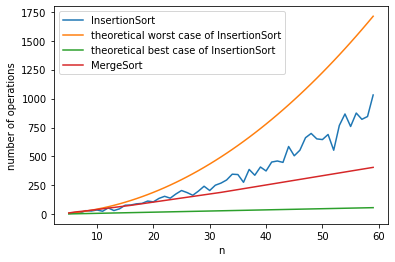

In [124]:
x=[n for n in range(5,60)] 
y1=[n*(n-1)/2 for n in range(5,60)] # worst case
y2=[n-1 for n in range(5,60)] # best case
y=[]; 
y3 = []
c=0
r=0

for n in range(5,60):
  a = rd.sample(range(1, 100), n)
  b = a.copy()
  a,counter = InsertionSort(a)
  b,counter2, c = MergeSort(b,False, c, r )
  y.append(counter)
  y3.append(counter2)

plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.legend(["InsertionSort", "theoretical worst case of InsertionSort", "theoretical best case of InsertionSort", "MergeSort"])

plt.xlabel('n')
plt.ylabel('number of operations')
plt.show()

**Análisis de los resultados**

En el grafico podemos apreciar como la función Merge en promedio es más estable a la hora de ordenar datos en comparación a la función InsertionSort, eso si, cabe recalcar que este algoritmo decae contra el mejor caso teorico del InsertionSort y además que la función Merge tiene una notoria utilización de memoria ya que para poder ordenar los dato con la función Merge, está genera nuevos arreglos para poder almacenar los datos ordenados.

Y en terminos de tiempo de ejecución podemos comprobar gráficamente que la función Merge tiene una complejidad de $O(nlog_2n)$.

##5.2. Tiempo de ejecución (Experimental)

En el siguiente gráfico se reporta el tiempo de ejecución del algoritmo MergeSort en función del tamaño del problema para arreglos generados aleatoreamente de largos entre 5 y 200.

In [172]:
#Funcion Merge1

def Merge1(der, izq):
  b = []
  while  True: 
    if len(der) > 0 and len(izq) > 0: 
      if der[0] < izq[0]: 
        b.append(der[0])
        der.pop(0)
      else:
        b.append(izq[0]) 
        izq.pop(0) 
    else:
      break; 
      
  if len(izq) > 0 :
    while len(izq) > 0:
      b.append(izq[0])
      izq.pop(0)
  else:
    while len(der) > 0:
      b.append(der[0])
      der.pop(0)
      

  return b

In [171]:
#Funcion MergeSort1

def MergeSort1(A):
  largo = len(A)
  if(largo == 1): return A 
  mitad = largo//2

  izquierda = A[0:mitad] 
  derecha = A[mitad:] 
  

  izquierda= MergeSort1(izquierda) 
  derecha = MergeSort1(derecha)

  return Merge1(derecha, izquierda) 

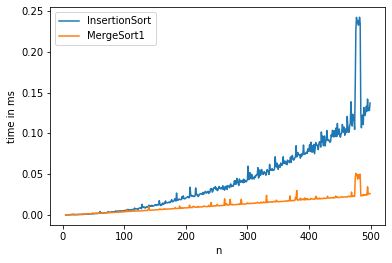

In [176]:
x=[]; y=[]
y2=[]

for n in range(5,500):

  a = rd.sample(range(1, 1000), n)
  b = a.copy()

  #la función repeat está ejecutando 20 veces bubble_sort con el arreglo a y retorna el mejor tiepo obtenido.
  t = repeat(setup="from __main__ import InsertionSort", stmt=f"InsertionSort({a})", repeat=1, number=10)
  t2= repeat(setup="from __main__ import MergeSort1",stmt = f"MergeSort1({a})", repeat=1, number=10)

  x.append(n)
  y.append(t)
  y2.append(t2)


plt.plot(x,y)
plt.plot(x,y2)
plt.legend(["InsertionSort", "MergeSort1"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()